In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import DBSCAN


In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nitindatta/finance-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'finance-data' dataset.
Path to dataset files: /kaggle/input/finance-data


In [9]:
df = pd.read_csv("/kaggle/input/finance-data/Finance_data.csv")   # ajuste o nome se necessário
print(df.head())
print(df.info())

   gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0  Female   34                Yes             1              2           5   
1  Female   23                Yes             4              3           2   
2    Male   30                Yes             3              6           4   
3    Male   22                Yes             2              1           3   
4  Female   24                 No             2              1           3   

   Government_Bonds  Fixed_Deposits  PPF  Gold  ...           Duration  \
0                 3               7    6     4  ...          1-3 years   
1                 1               5    6     7  ...  More than 5 years   
2                 2               5    1     7  ...          3-5 years   
3                 7               6    4     5  ...   Less than 1 year   
4                 6               4    5     7  ...   Less than 1 year   

  Invest_Monitor   Expect       Avenue What are your savings objectives?  \
0        M

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Colunas numéricas:", numeric_cols)


Colunas numéricas: Index(['age', 'Mutual_Funds', 'Equity_Market', 'Debentures',
       'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold'],
      dtype='object')


In [11]:
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))

z_threshold = 3
outliers_zscore = (z_scores > z_threshold)

print("Quantidade de outliers por coluna (Z-Score):")
print(outliers_zscore.sum())


Quantidade de outliers por coluna (Z-Score):
2


In [12]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)

print("Quantidade de outliers por coluna (IQR):")
print(outliers_iqr.sum())


Quantidade de outliers por coluna (IQR):
age                 0
Mutual_Funds        3
Equity_Market       4
Debentures          1
Government_Bonds    7
Fixed_Deposits      0
PPF                 5
Gold                4
dtype: int64


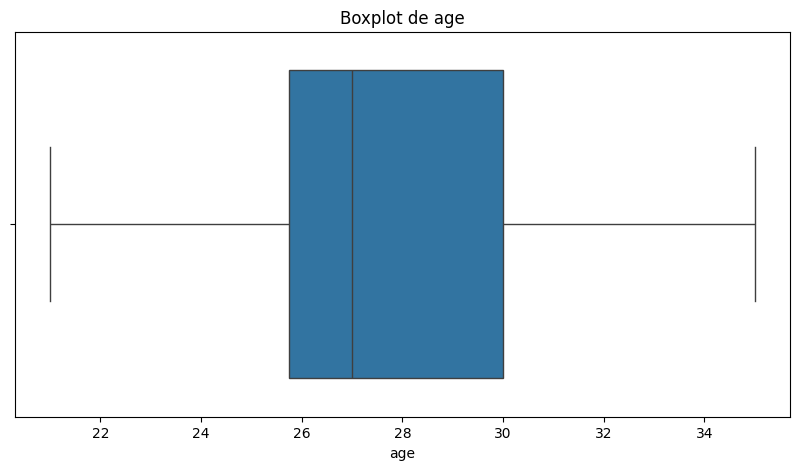

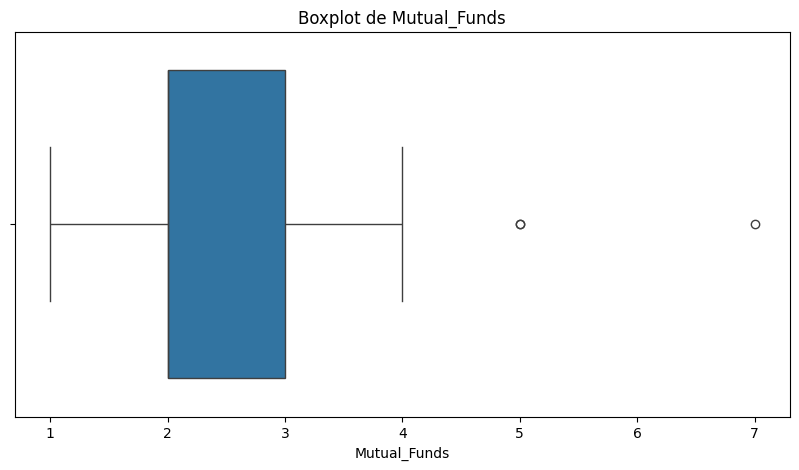

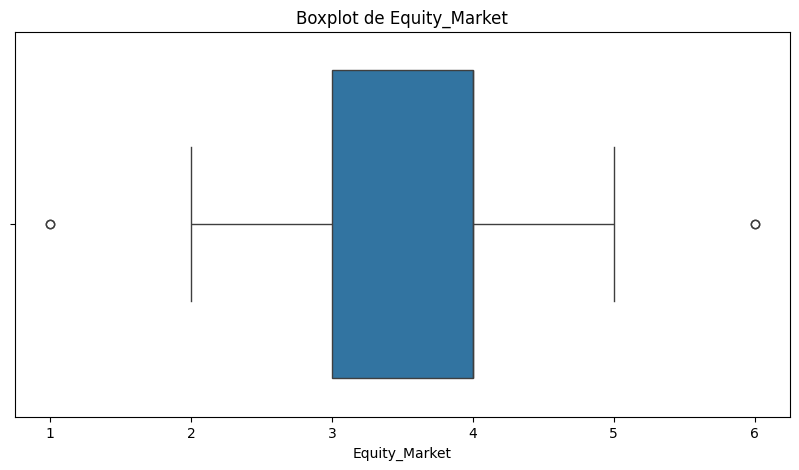

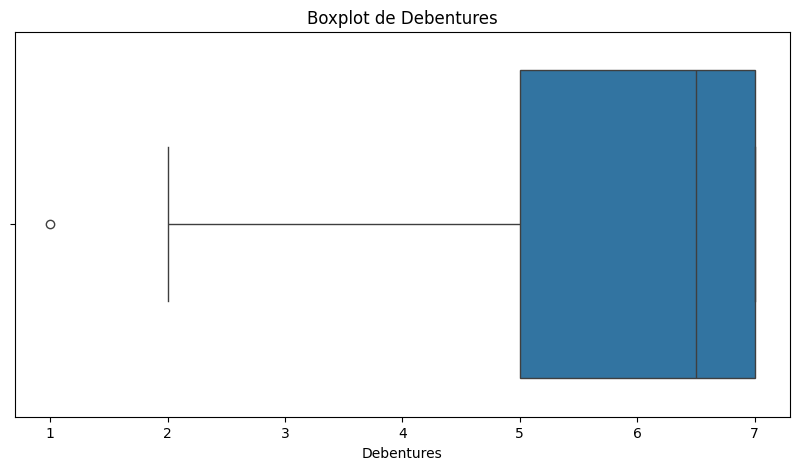

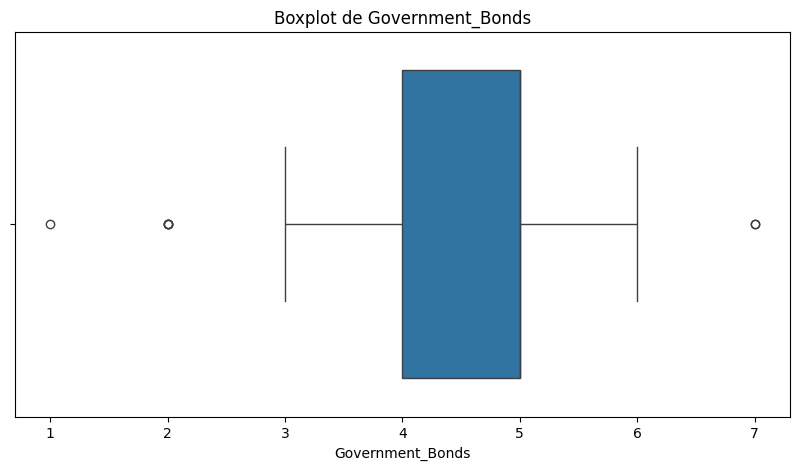

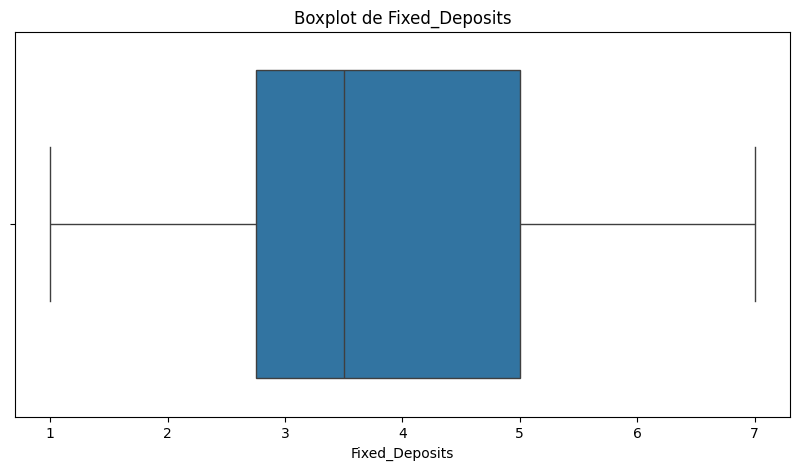

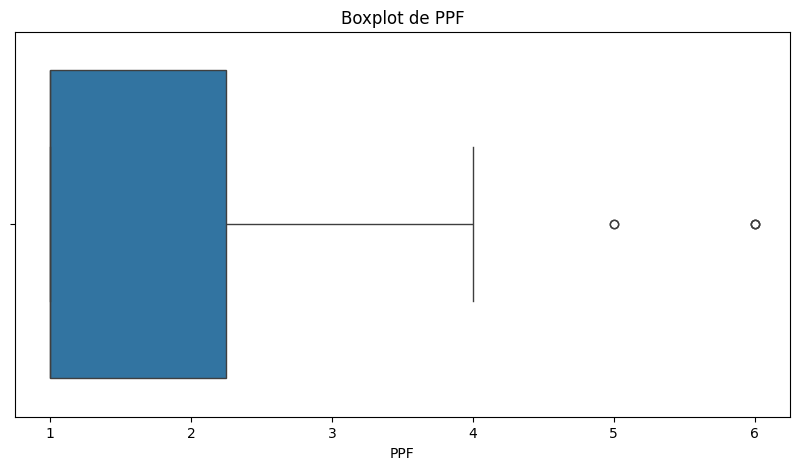

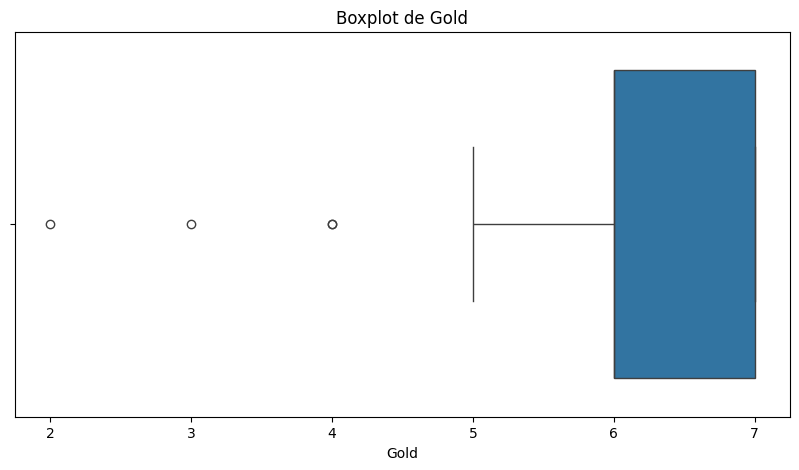

In [13]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


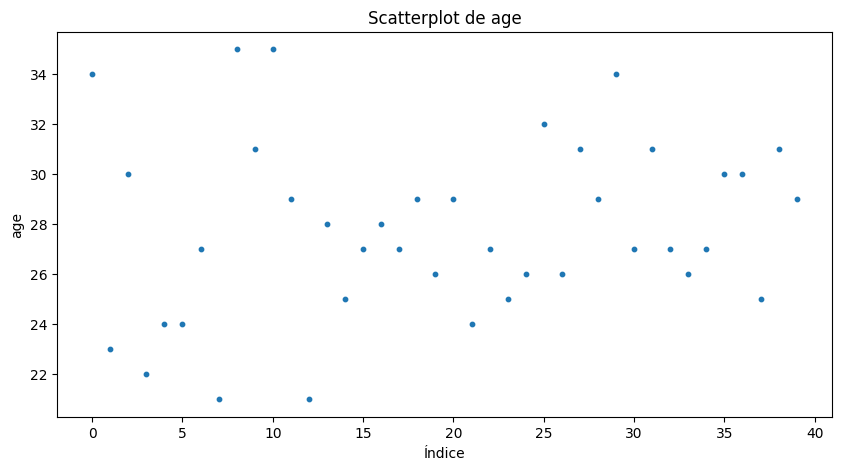

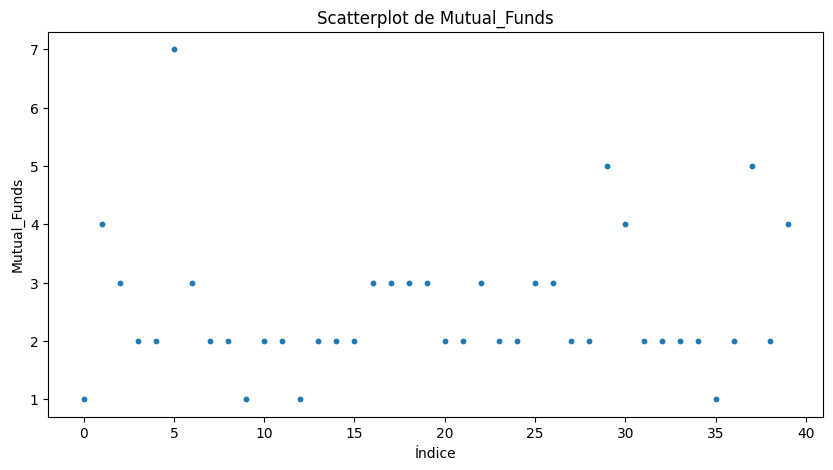

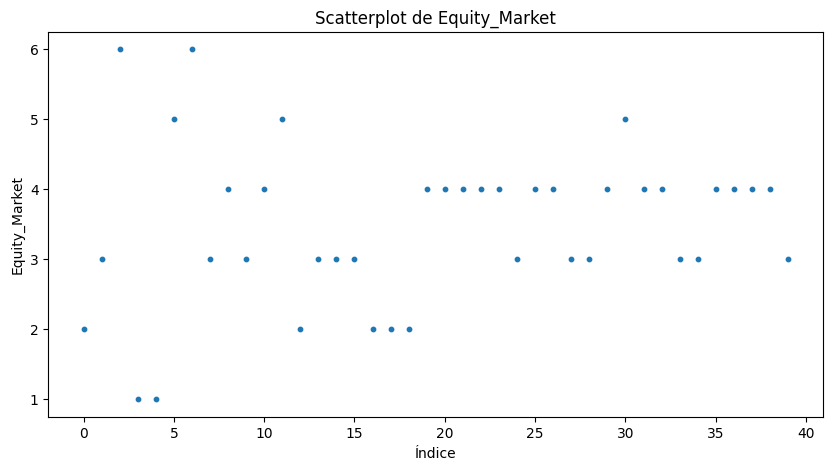

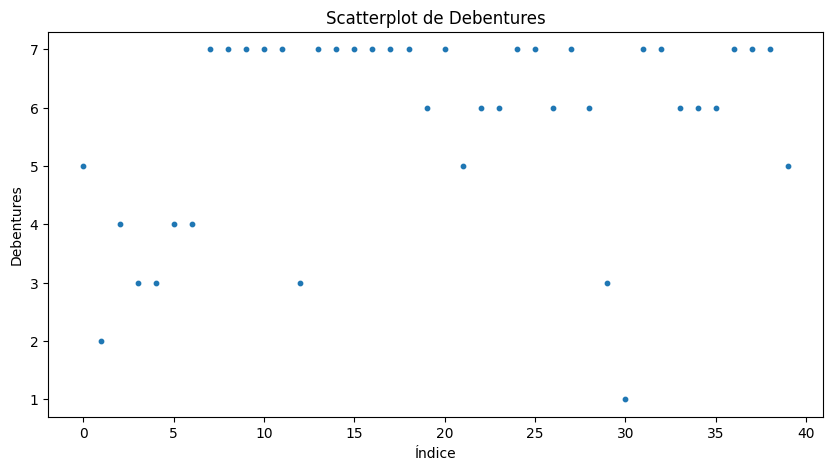

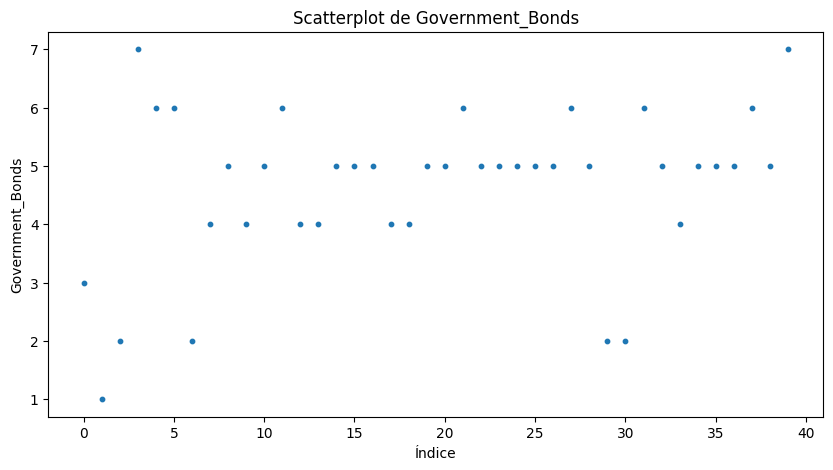

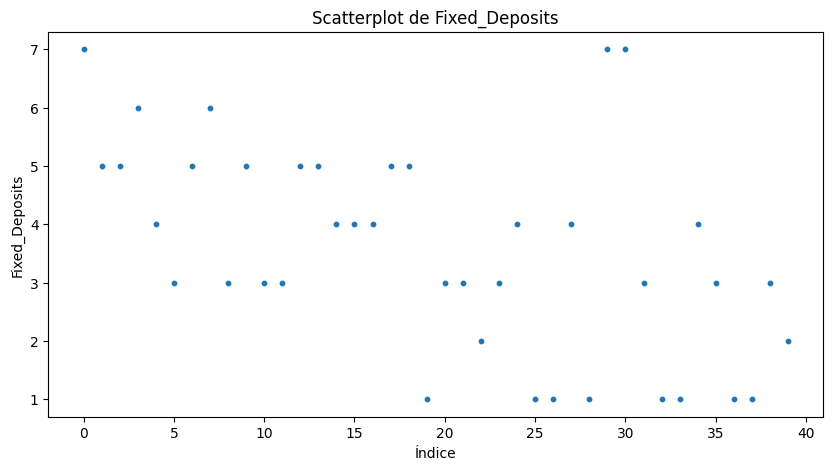

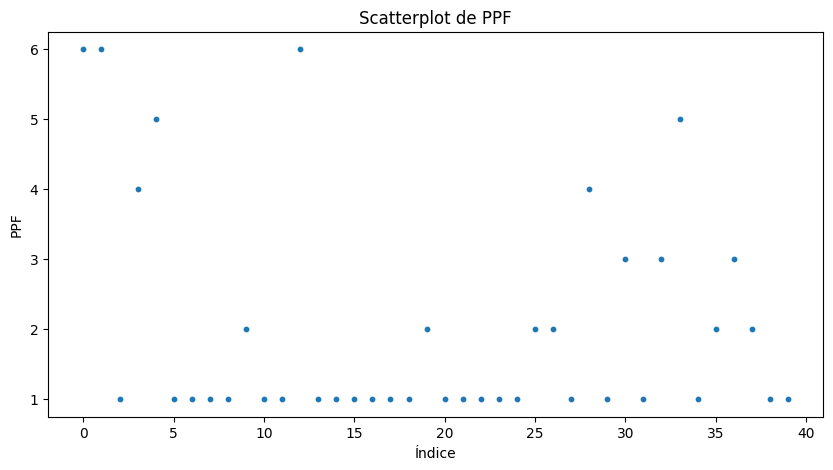

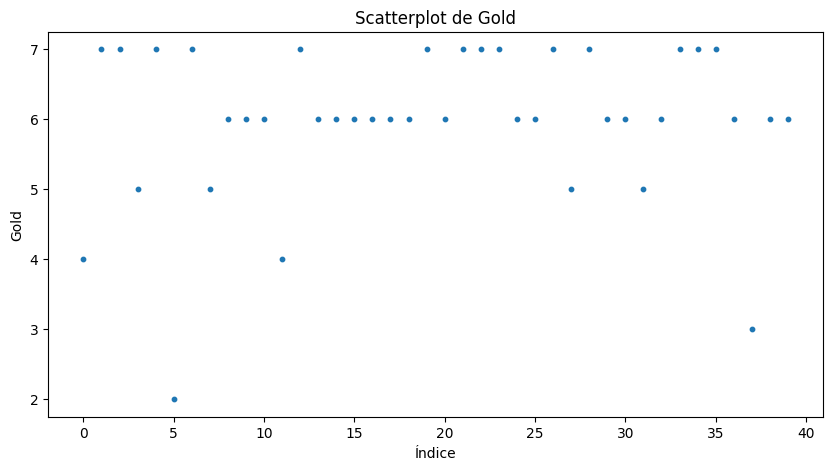

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    plt.scatter(df.index, df[col], s=10)
    plt.title(f"Scatterplot de {col}")
    plt.xlabel("Índice")
    plt.ylabel(col)
    plt.show()


In [15]:
df_removed = df[(z_scores < z_threshold).all(axis=1)]
print("Shape original:", df.shape)
print("Shape após remoção:", df_removed.shape)


Shape original: (40, 24)
Shape após remoção: (39, 24)


In [16]:
df_capped = df.copy()

for col in numeric_cols:
    df_capped[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df_capped[col] = np.where(df_capped[col] > upper_bound[col], upper_bound[col], df_capped[col])


In [17]:
df_transformed = df.copy()

for col in numeric_cols:
    if (df[col] > 0).all():
        df_transformed[col+"_log"] = np.log(df[col])
        df_transformed[col+"_sqrt"] = np.sqrt(df[col])


In [18]:
print("=== Estatísticas Originais ===")
print(df[numeric_cols].describe())


=== Estatísticas Originais ===
             age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
count  40.000000     40.000000      40.000000   40.000000         40.000000   
mean   27.800000      2.550000       3.475000    5.750000          4.650000   
std     3.560467      1.197219       1.131994    1.675617          1.369072   
min    21.000000      1.000000       1.000000    1.000000          1.000000   
25%    25.750000      2.000000       3.000000    5.000000          4.000000   
50%    27.000000      2.000000       4.000000    6.500000          5.000000   
75%    30.000000      3.000000       4.000000    7.000000          5.000000   
max    35.000000      7.000000       6.000000    7.000000          7.000000   

       Fixed_Deposits        PPF       Gold  
count       40.000000  40.000000  40.000000  
mean         3.575000   2.025000   5.975000  
std          1.795828   1.609069   1.143263  
min          1.000000   1.000000   2.000000  
25%          2.750000   1.0

In [19]:
print("=== Após Remoção de Outliers ===")
print(df_removed[numeric_cols].describe())


=== Após Remoção de Outliers ===
             age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
count  39.000000     39.000000      39.000000   39.000000         39.000000   
mean   27.897436      2.435897       3.435897    5.794872          4.615385   
std     3.552574      0.967767       1.119090    1.672997          1.369122   
min    21.000000      1.000000       1.000000    1.000000          1.000000   
25%    26.000000      2.000000       3.000000    5.000000          4.000000   
50%    27.000000      2.000000       4.000000    7.000000          5.000000   
75%    30.000000      3.000000       4.000000    7.000000          5.000000   
max    35.000000      5.000000       6.000000    7.000000          7.000000   

       Fixed_Deposits        PPF       Gold  
count       39.000000  39.000000  39.000000  
mean         3.589744   2.051282   6.076923  
std          1.816850   1.621382   0.956546  
min          1.000000   1.000000   3.000000  
25%          2.500000   1

In [20]:
print("=== Após Capping ===")
print(df_capped[numeric_cols].describe())


=== Após Capping ===
             age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
count  40.000000     40.000000      40.000000   40.000000          40.00000   
mean   27.800000      2.462500       3.475000    5.775000           4.71250   
std     3.560467      0.949949       1.025008    1.609069           1.13729   
min    21.000000      1.000000       1.500000    2.000000           2.50000   
25%    25.750000      2.000000       3.000000    5.000000           4.00000   
50%    27.000000      2.000000       4.000000    6.500000           5.00000   
75%    30.000000      3.000000       4.000000    7.000000           5.00000   
max    35.000000      4.500000       5.500000    7.000000           6.50000   

       Fixed_Deposits        PPF       Gold  
count       40.000000  40.000000  40.000000  
mean         3.575000   1.840625   6.100000  
std          1.795828   1.204288   0.825864  
min          1.000000   1.000000   4.500000  
25%          2.750000   1.000000   6.